**Importing**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

**Loading The Dataset**

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


 **Data Preprocessing (Dropping)**

In [ ]:
#Check the number of unique values
df.select_dtypes(include='object').nunique()

,0
PassengerId,8693
HomePlanet,3
CryoSleep,2
Cabin,6560
Destination,3
VIP,2
Name,8473


In [ ]:
# Remove unnecesary attributes (PassengerID, Cabin, Name)
df.drop(columns=['PassengerId', 'Cabin', 'Name'], inplace=True)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


 **Exploratory Data Analysis**

<ipython-input-6-611c29ea9411>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-6-611c29ea9411>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-6-611c29ea9411>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-6-611c29ea9411>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)


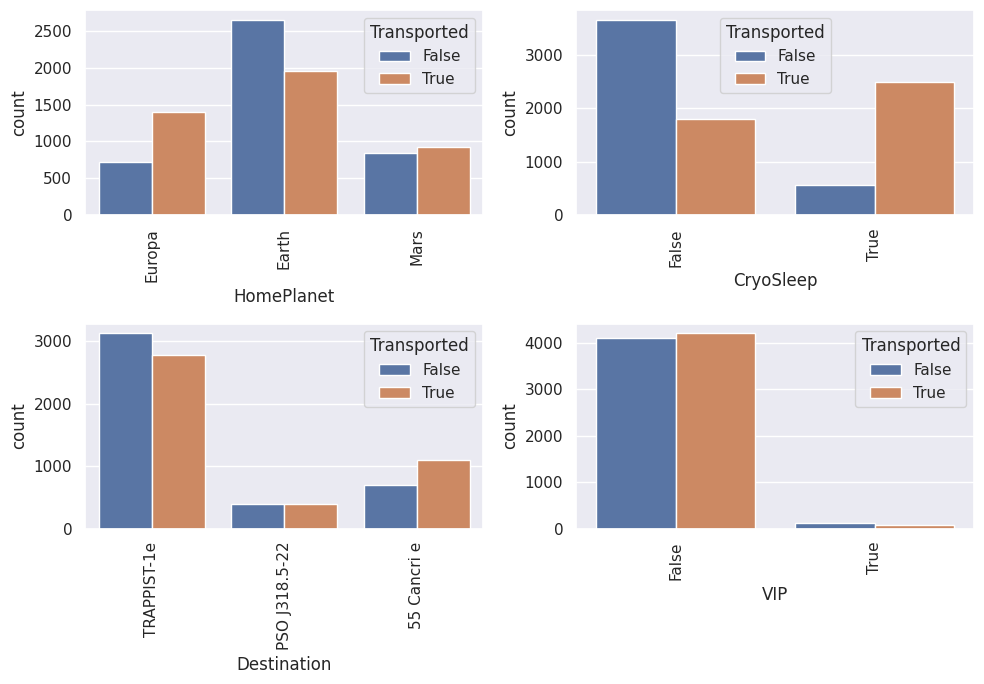

In [ ]:
cat_vars = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
axs = axs.flatten()

for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Transported', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

fig.tight_layout()

plt.show()

**Pie charts for different categories**

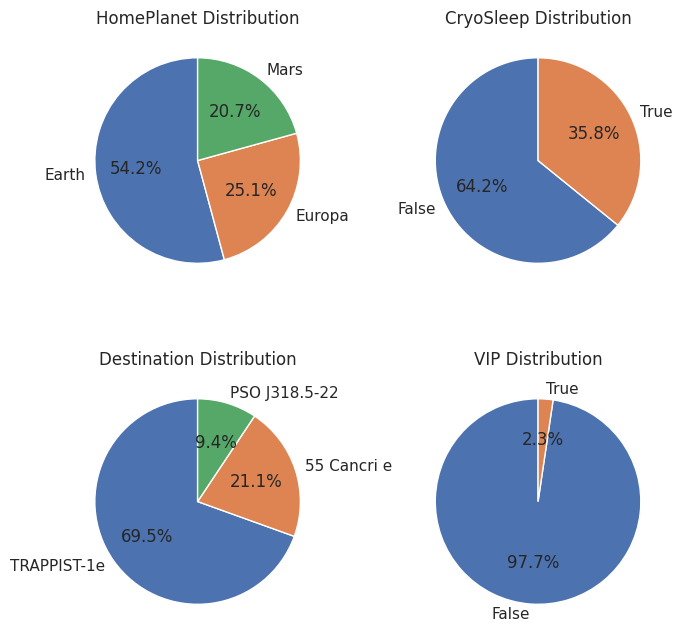

In [ ]:
cat_vars = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        cat_counts = df[var].value_counts()

        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')

fig.tight_layout()
plt.show()

 **Data Preprocessing (Missing Values)**

In [ ]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

,0
CryoSleep,2.496261
ShoppingMall,2.392730
VIP,2.335212
HomePlanet,2.312205
VRDeck,2.162660
FoodCourt,2.105142
Spa,2.105142
Destination,2.093639
RoomService,2.082135
Age,2.059128


In [ ]:
df.shape

(8693, 11)

In [ ]:
# Remove null values
df.dropna(inplace=True)
df.shape

(6923, 11)

 **Label Encoding for each Object datatype**

In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

HomePlanet: ['Europa' 'Earth' 'Mars']
CryoSleep: [False True]
Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
VIP: [False True]


In [ ]:
df['CryoSleep'] = df['CryoSleep'].replace('nan', np.nan)
df['VIP'] = df['VIP'].replace('nan', np.nan)
df.dropna(inplace=True)
df.shape

(6923, 11)

In [ ]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

HomePlanet: [1 0 2]
CryoSleep: [0 1]
Destination: [2 1 0]
VIP: [0 1]


 **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
# Select the features (X) and the target variable (y)
X = df.drop('Transported', axis=1)
y = df['Transported']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

 **Remove the Outlier from train data using IQR**

In [ ]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Age', 'RoomService', 'FoodCourt',
                    'ShoppingMall','Spa','VRDeck']

# Calculate the IQR for the selected columns in the training data
Q1 = X_train[selected_columns].quantile(0.25)
Q3 = X_train[selected_columns].quantile(0.75)
IQR = Q3 - Q1

# Set a threshold value for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5

# Find the indices of outliers based on the threshold
outlier_indices = ((X_train[selected_columns] < (Q1 - threshold * IQR)) |
                   (X_train[selected_columns] > (Q3 + threshold * IQR))).any(axis=1)

# Remove the outliers from the training data
X_train = X_train[~outlier_indices]
y_train = y_train[~outlier_indices]

**Decision Tree (Algorithm 1)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_leaf=3, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=3,
                       random_state=0)

**Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 68.95 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.6895306859205776
Precision Score :  0.6895306859205776
Recall Score :  0.6895306859205776
Jaccard Score :  0.5261707988980716
Log Loss :  11.19044834463565


**Importance of each column in Decision Tree Algorithm**

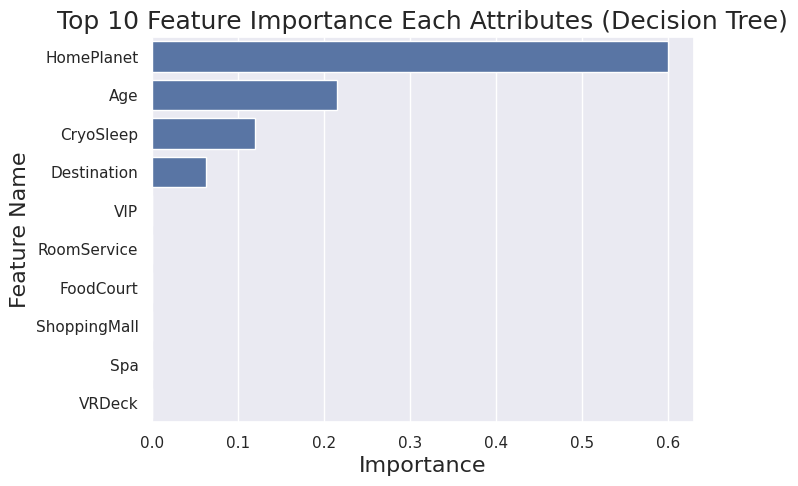

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(7,5))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

**Comparision b/w Actual and predicted labels**

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.6895306859205776')

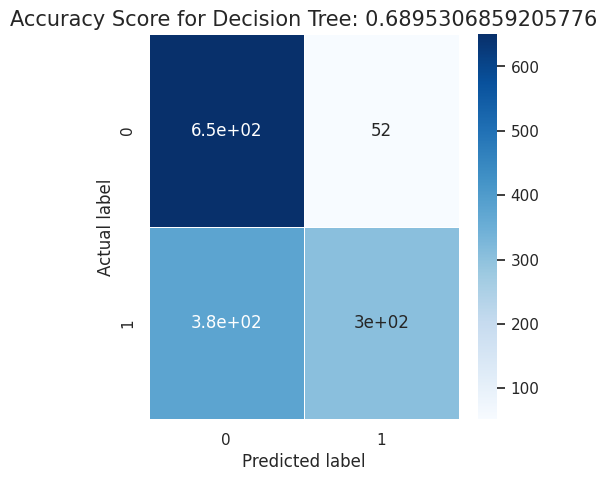

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

**Random Forest (Algorithm 2)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': None, 'n_estimators': 100, 'random_state': 42}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, max_features= None, n_estimators=100, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=None,
                       random_state=42)

**Accuracy**

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 64.55 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.6454873646209386
Precision Score :  0.6454873646209386
Recall Score :  0.6454873646209386
Jaccard Score :  0.47654584221748403
Log Loss :  12.77793055166536


**Importance of each column in Random forest Algorithm**

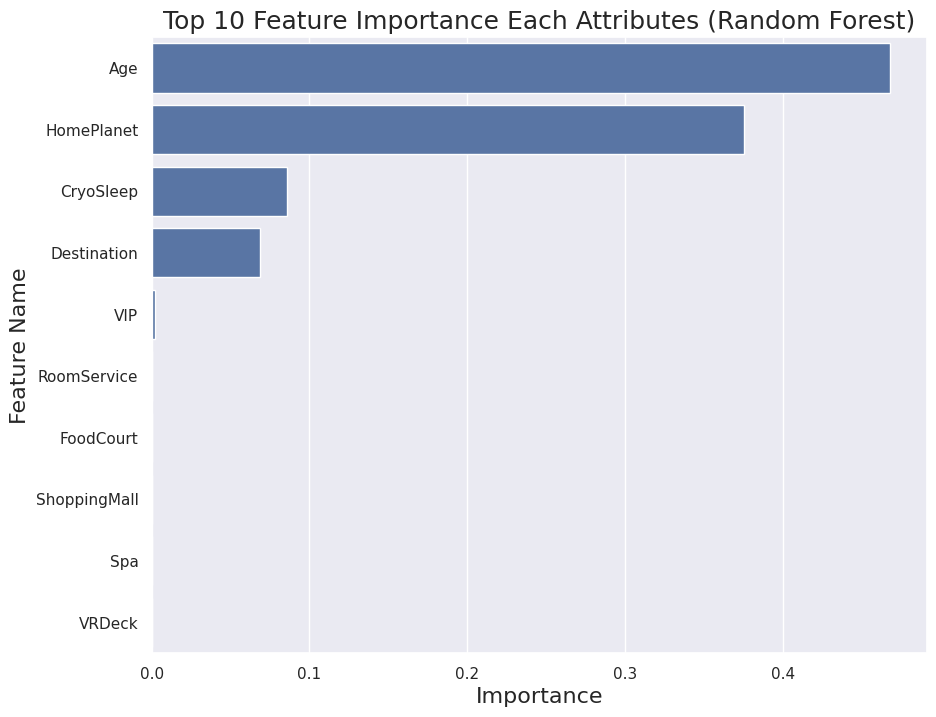

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

**Comparision b/w Actual and Predicted labels**

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.6454873646209386')

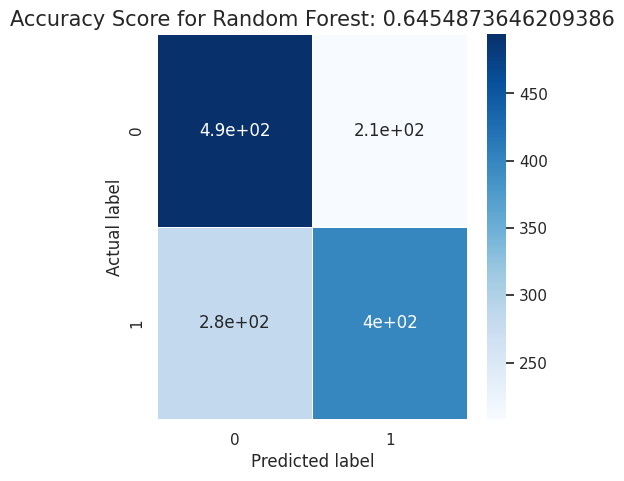

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

**Submission.csv**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load training and test data
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Step 1: Data Preprocessing

# Drop irrelevant columns from train and test data
X_train = train_data.drop(columns=['Transported', 'PassengerId', 'Cabin', 'Name'])
y_train = train_data['Transported']
test_data_clean = test_data.drop(columns=['PassengerId', 'Cabin', 'Name'], errors='ignore')

# Fill missing values with 'Unknown' for categorical columns
X_train.fillna('Unknown', inplace=True)
test_data_clean.fillna('Unknown', inplace=True)

# Step 2: Convert boolean columns to integers (True -> 1, False -> 0)
for col in X_train.select_dtypes(include=['bool']).columns:
    X_train[col] = X_train[col].astype(int)
for col in test_data_clean.select_dtypes(include=['bool']).columns:
    test_data_clean[col] = test_data_clean[col].astype(int)

# Step 3: Convert all object columns to strings to ensure consistent encoding
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = X_train[col].astype(str)
for col in test_data_clean.select_dtypes(include=['object']).columns:
    test_data_clean[col] = test_data_clean[col].astype(str)

# Step 4: Label Encoding for Categorical Columns
label_encoders = {}
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    # Fit and transform the encoder for both train and test data to ensure consistency
    le.fit(pd.concat([X_train[col], test_data_clean[col]], axis=0))  # Fit on both train and test data
    X_train[col] = le.transform(X_train[col])
    test_data_clean[col] = le.transform(test_data_clean[col])
    label_encoders[col] = le

# Step 5: Encode the target variable (Transported) as 0 (False) and 1 (True)
y_train = y_train.map({True: 1, False: 0})

# Step 6: Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Make Predictions on the test data
test_data_clean = test_data_clean.apply(pd.to_numeric, errors='coerce')  # Ensure all columns are numeric
test_data_clean.fillna(0, inplace=True)  # Fill any NaN values after conversion
predictions = model.predict(test_data_clean)

# Step 8: Prepare the submission file
submission = pd.read_csv('/content/sample_submission.csv')  # Load the sample_submission.csv

# Ensure submission has the same length as the test data
submission = submission.iloc[:len(test_data)]  # Match the length of the test data
submission['Transported'] = predictions  # Set predictions as the 'Transported' column

# Step 9: Convert predictions back to True/False
submission['Transported'] = submission['Transported'].map({1: True, 0: False})

# Step 10: Save the submission file
submission.to_csv('final_submission.csv', index=False)
print("Submission file saved as 'final_submission.csv'")


<ipython-input-63-defb573ba6f2>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  X_train.fillna('Unknown', inplace=True)
<ipython-input-63-defb573ba6f2>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_data_clean.fillna('Unknown', inplace=True)


Submission file saved as 'submission.csv'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')